In [7]:
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt

ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [8]:
df_sg = df[df['job_country'] == 'Singapore'].copy()
df_sg

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
25,Senior Data Analyst,"Senior Officer, Data Analyst, GTO",Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-06-23 13:56:10,True,False,Singapore,None,NaN,NaN,United Overseas Bank,['sql'],{'programming': ['sql']}
44,Data Scientist,Binance Accelerator Program - Data Scientist (...,Singapore,via LinkedIn,Contractor,False,Singapore,2023-04-12 13:53:26,False,False,Singapore,None,NaN,NaN,Binance,"['python', 'java', 'scala']","{'programming': ['python', 'java', 'scala']}"
82,Data Engineer,Cbi Application Data Design Engineer,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-12-24 13:17:39,False,False,Singapore,None,NaN,NaN,Siemens,None,None
87,Data Scientist,Data Science Team Lead,Singapore,via LinkedIn,Full-time,False,Singapore,2023-03-23 13:47:01,False,False,Singapore,None,NaN,NaN,GovTech Singapore,"['r', 'python', 'tableau', 'qlik']","{'analyst_tools': ['tableau', 'qlik'], 'progra..."
101,Data Analyst,Data Analyst,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-12-20 13:15:45,True,False,Singapore,None,NaN,NaN,Moovaz,['sql'],{'programming': ['sql']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785361,Senior Data Scientist,Senior Design Engineer (Instrumentation),Singapura,melalui Recruit.net,Kontraktor,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,Rotary Engineering Pte. Ltd.,"['sheets', 'excel', 'word', 'terminal']","{'analyst_tools': ['sheets', 'excel', 'word'],..."
785454,Data Analyst,Data Analyst (Business Statistics),Singapore,via LinkedIn,Full-time,False,Singapore,2023-10-04 06:22:16,True,False,Singapore,None,NaN,NaN,Singapore Department of Statistics (DOS),None,None
785604,Data Engineer,"Associate Engineer, Operation (Data Centre)",Singapore,via LinkedIn,Full-time,False,Singapore,2023-01-16 06:23:31,False,False,Singapore,None,NaN,NaN,Singtel,None,None
785733,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:17,False,False,Singapore,None,NaN,NaN,Hydra X Pte. Ltd.,"['docker', 'kubernetes']","{'other': ['docker', 'kubernetes']}"


In [9]:
df_sg['job_posted_month'] = df_sg['job_posted_date'].dt.strftime('%B')
df_sg

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
25,Senior Data Analyst,"Senior Officer, Data Analyst, GTO",Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-06-23 13:56:10,True,False,Singapore,None,NaN,NaN,United Overseas Bank,['sql'],{'programming': ['sql']},June
44,Data Scientist,Binance Accelerator Program - Data Scientist (...,Singapore,via LinkedIn,Contractor,False,Singapore,2023-04-12 13:53:26,False,False,Singapore,None,NaN,NaN,Binance,"['python', 'java', 'scala']","{'programming': ['python', 'java', 'scala']}",April
82,Data Engineer,Cbi Application Data Design Engineer,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-12-24 13:17:39,False,False,Singapore,None,NaN,NaN,Siemens,None,None,December
87,Data Scientist,Data Science Team Lead,Singapore,via LinkedIn,Full-time,False,Singapore,2023-03-23 13:47:01,False,False,Singapore,None,NaN,NaN,GovTech Singapore,"['r', 'python', 'tableau', 'qlik']","{'analyst_tools': ['tableau', 'qlik'], 'progra...",March
101,Data Analyst,Data Analyst,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-12-20 13:15:45,True,False,Singapore,None,NaN,NaN,Moovaz,['sql'],{'programming': ['sql']},December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785361,Senior Data Scientist,Senior Design Engineer (Instrumentation),Singapura,melalui Recruit.net,Kontraktor,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,Rotary Engineering Pte. Ltd.,"['sheets', 'excel', 'word', 'terminal']","{'analyst_tools': ['sheets', 'excel', 'word'],...",March
785454,Data Analyst,Data Analyst (Business Statistics),Singapore,via LinkedIn,Full-time,False,Singapore,2023-10-04 06:22:16,True,False,Singapore,None,NaN,NaN,Singapore Department of Statistics (DOS),None,None,October
785604,Data Engineer,"Associate Engineer, Operation (Data Centre)",Singapore,via LinkedIn,Full-time,False,Singapore,2023-01-16 06:23:31,False,False,Singapore,None,NaN,NaN,Singtel,None,None,January
785733,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:17,False,False,Singapore,None,NaN,NaN,Hydra X Pte. Ltd.,"['docker', 'kubernetes']","{'other': ['docker', 'kubernetes']}",March


In [12]:
df_sg_pivot = df_sg.pivot_table(index= 'job_posted_month', columns= 'job_title_short', aggfunc= 'size')
df_sg_pivot.reset_index(inplace= True)


df_sg_pivot['month_no'] = pd.to_datetime(df_sg_pivot['job_posted_month'], format= '%B').dt.month
df_sg_pivot.sort_values('month_no', inplace= True)
df_sg_pivot.set_index('job_posted_month', inplace=True)
df_sg_pivot.drop(columns= 'month_no', inplace= True)
df_sg_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,156,30,639,604,372,68,111,110,108,153
February,114,10,392,400,225,53,80,67,71,87
March,146,30,538,462,284,87,118,84,58,185
April,259,77,521,486,332,75,103,87,69,202
May,115,25,462,408,274,35,97,61,56,79
June,150,22,560,513,319,60,89,105,70,77
July,165,28,662,524,282,59,121,96,66,138
August,193,42,625,593,334,79,96,100,75,139
September,140,28,348,302,170,54,53,54,40,100


In [14]:
df_sg_sw_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col= 'job_posted_month')
df_sg_sw_pivot 

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [16]:
df_sg_merged = df_sg_pivot.merge(df_sg_sw_pivot, on= 'job_posted_month')
df_sg_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,156,30,639,604,372,68,111,110,108,153,13619,9827,5108,4348
February,114,10,392,400,225,53,80,67,71,87,11456,9116,7298,4284
March,146,30,538,462,284,87,118,84,58,185,11102,8178,5814,4159
April,259,77,521,486,332,75,103,87,69,202,14037,9209,7232,4220
May,115,25,462,408,274,35,97,61,56,79,12126,8864,6718,4980
June,150,22,560,513,319,60,89,105,70,77,12003,8065,5902,4781
July,165,28,662,524,282,59,121,96,66,138,11914,8061,6839,4344
August,193,42,625,593,334,79,96,100,75,139,11571,8191,7413,4104
September,140,28,348,302,170,54,53,54,40,100,14016,8447,6139,4094


In [18]:
top_5 = (
    df_sg_merged
    .sum()
    .sort_values(ascending= False)
    .head().index
    .to_list()
)

top_5


['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Analyst']

(0.0, 30000.0)

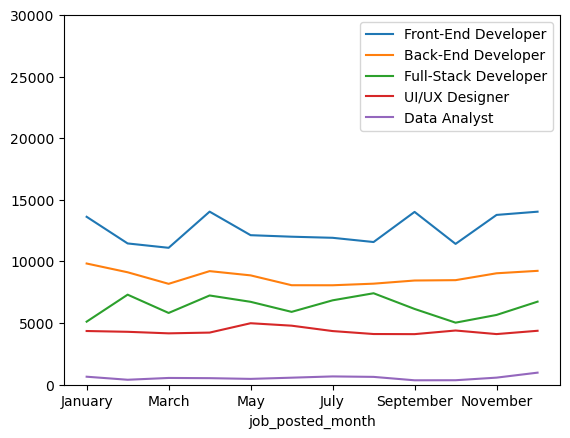

In [20]:
df_sg_merged[top_5].plot(kind= 'line')
plt.ylim(0,30000)